In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from google.colab.patches import cv2_imshow
import os
import cv2
import numpy as np
import pandas as pd
import torchvision.datasets as dset
import matplotlib.pyplot as plt

In [3]:
#Importing Libraries
%matplotlib inline
import torchvision
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader,Dataset
import matplotlib.pyplot as plt
import torchvision.utils
import numpy as np
import random
from PIL import Image
import torch
from torch.autograd import Variable
import PIL.ImageOps
import torch.nn as nn
from torch import optim
import torch.nn.functional as F
import torchvision.transforms as T
from torch.optim.lr_scheduler import StepLR, ReduceLROnPlateau

In [4]:
import os

# Define the folder path
folder_path = '/content/drive/My Drive/lfw_mini'

# List files in the specified folder
file_list = os.listdir(folder_path)
# Example: Display the first 10 files in the folder
print(file_list[:10])

['Adam_Scott', 'Alex_Cabrera', 'Andrei_Konchalovsky', 'Alexandre_Despatie', 'Andy_Dick', 'Antonio_Trillanes', 'Arnaud_Lagardere', 'Abdullatif_Sener', 'Bernard_Giraudeau', 'Alexander_Lukashenko']


In [5]:
# Initialize a dictionary to store the counts
image_counts = {}

# Iterate through the subdirectories
for person_folder in os.listdir(folder_path):
    person_folder_path = os.path.join(folder_path, person_folder)

    # Check if it's a directory
    if os.path.isdir(person_folder_path):
        # Count the number of image files in the folder
        image_count = len([file for file in os.listdir(person_folder_path) if file.lower().endswith(('.png', '.jpg', '.jpeg'))])
        image_counts[person_folder] = image_count

# Print the structured results
for person, count in image_counts.items():
    print(f"{person}: {count} images")

Adam_Scott: 2 images
Alex_Cabrera: 1 images
Andrei_Konchalovsky: 1 images
Alexandre_Despatie: 1 images
Andy_Dick: 1 images
Antonio_Trillanes: 3 images
Arnaud_Lagardere: 1 images
Abdullatif_Sener: 2 images
Bernard_Giraudeau: 1 images
Alexander_Lukashenko: 1 images
Alex_Gonzalez: 1 images
Bruce_Arena: 1 images
Bob_Herz: 1 images
Andrew_Wetzler: 1 images
Amanda_Plumer: 1 images
Brad_Alexander_Smith: 1 images
Brendan_Gaughan: 1 images
Agbani_Darego: 1 images
Amanda_Marsh: 1 images
Amr_Moussa: 1 images
Art_Cooper: 1 images
Arie_Haan: 1 images
Bill_Fennelly: 1 images
Brian_Cook: 1 images
Benjamin_Neulander: 1 images
Bob_Wright: 1 images
Bob_Riley: 1 images
Ana_Paula_Gerard: 1 images
Alfredo_Pena: 1 images
Bak_Chang-Ryun: 1 images
Brooke_Shields: 2 images
Amy_Brenneman: 1 images
Alanis_Morissette: 1 images
Andy_Perez: 1 images
Bill_Parsons: 1 images
Aidan_Quinn: 1 images
Barry_Zito: 2 images
Brandon_Hammond: 1 images
Ai_Sugiyama: 5 images
Bruce_Lunsford: 1 images
Adoor_Gopalakarishnan: 1 imag

Images of Adam_Scott:


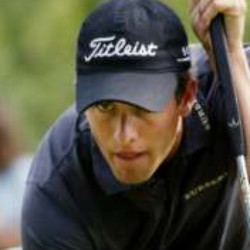

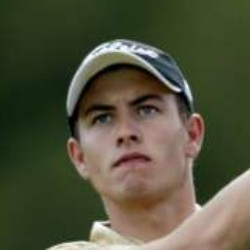

Images of Alex_Cabrera:


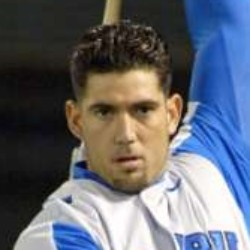

In [6]:
# Initialize a list to store the names of the first two people
sample_people = []

# Iterate through the file list and collect the first two people's names
for file in file_list:
    if os.path.isdir(os.path.join(folder_path, file)):
        sample_people.append(file)

# Iterate through the first two people and print their images
for person in sample_people[:2]:
    person_folder_path = os.path.join(folder_path, person)
    print(f"Images of {person}:")

    # Initialize a list to store image paths
    image_paths = []

    # Collect image paths for the current person
    for file in os.listdir(person_folder_path):
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_paths.append(os.path.join(person_folder_path, file))

    # Display the images for the current person
    for image_path in image_paths:
        img = cv2.imread(image_path)
        cv2_imshow(img)

In [7]:
import os
import random
import shutil


# Set the ratio for train, validation, and test splits
train_ratio = 0.6  # 60% for training
validation_ratio = 0.20  # 20% for validation
test_ratio = 0.20  # 20% for testing

# Create the destination directories for train, validation, and test
train_path = 'train'
validation_path = 'validation'
test_path = 'test'

os.makedirs(train_path, exist_ok=True)
os.makedirs(validation_path, exist_ok=True)
os.makedirs(test_path, exist_ok=True)

# List all the person folders in the specified folder
person_folders = os.listdir(folder_path)

# Loop through each person folder and split their images
for person_folder in person_folders:
    person_images = os.listdir(os.path.join(folder_path, person_folder))
    random.shuffle(person_images)

    # Calculate the number of images for each split
    num_images = len(person_images)
    num_train = int(train_ratio * num_images)
    num_validation = int(validation_ratio * num_images)
    num_test = num_images - num_train - num_validation

    # Split the images and copy them to the respective directories
    train_images = person_images[:num_train]
    validation_images = person_images[num_train:num_train + num_validation]
    test_images = person_images[num_train + num_validation:]

    for image in train_images:
        src_path = os.path.join(folder_path, person_folder, image)
        dst_path = os.path.join(train_path, person_folder, image)
        os.makedirs(os.path.dirname(dst_path), exist_ok=True)
        shutil.copy(src_path, dst_path)

    for image in validation_images:
        src_path = os.path.join(folder_path, person_folder, image)
        dst_path = os.path.join(validation_path, person_folder, image)
        os.makedirs(os.path.dirname(dst_path), exist_ok=True)
        shutil.copy(src_path, dst_path)

    for image in test_images:
        src_path = os.path.join(folder_path, person_folder, image)
        dst_path = os.path.join(test_path, person_folder, image)
        os.makedirs(os.path.dirname(dst_path), exist_ok=True)
        shutil.copy(src_path, dst_path)

 This code creates a dataset suitable for training a Siamese network, where pairs of images are generated such that approximately 50% of the pairs belong to the same class, and the other 50% belong to different classes. The dataset is designed to work with grayscale images and provides the flexibility to apply transformations to the images. The labels are generated to indicate whether the pairs are of the same or different classes

In [8]:
from torch.utils.data import Dataset
import random
from PIL import Image
import PIL.ImageOps
import torch
import numpy as np

class SiameseNetworkDataset(Dataset):

    def __init__(self, imageFolderDataset, transform=None, should_invert=True):
        # Initialize the dataset with the provided parameters
        self.imageFolderDataset = imageFolderDataset
        self.transform = transform
        self.should_invert = should_invert

    def __getitem__(self, index):
        # Randomly select an image (img0_tuple) from the dataset
        img0_tuple = random.choice(self.imageFolderDataset.imgs)

        # We need to make sure approximately 50% of images are in the same class
        should_get_same_class = random.randint(0, 1)

        if should_get_same_class:
            while True:
                # Keep looping until an image from the same class is found (img1_tuple)
                img1_tuple = random.choice(self.imageFolderDataset.imgs)
                if img0_tuple[1] == img1_tuple[1]:
                    break
        else:
            while True:
                # Keep looping until an image from a different class is found (img1_tuple)
                img1_tuple = random.choice(self.imageFolderDataset.imgs)
                if img0_tuple[1] != img1_tuple[1]:
                    break

        # Open and convert the selected images to grayscale
        img0 = Image.open(img0_tuple[0])
        img1 = Image.open(img1_tuple[0])
        img0 = img0.convert("L")
        img1 = img1.convert("L")

        # Invert the images if required
        if self.should_invert:
            img0 = PIL.ImageOps.invert(img0)
            img1 = PIL.ImageOps.invert(img1)

        # Apply the specified transformations to the images if provided
        if self.transform is not None:
            img0 = self.transform(img0)
            img1 = self.transform(img1)

        # Create the label tensor (1 for different classes, 0 for the same class)
        label = torch.from_numpy(np.array([int(img1_tuple[1] != img0_tuple[1])], dtype=np.float32))

        return img0, img1, label

    def __len__(self):
        # Return the total number of pairs in the dataset (equal to the number of images)
        return len(self.imageFolderDataset.imgs)

The imshow function can display individual images with optional text labels, and the show_plot function can display loss curves or other metrics across training iterations or epochs

In [9]:
#Helper Functions to plot the images and plots
def imshow(img,text=None,should_save=False):
    npimg = img.numpy()
    plt.axis("off")
    if text:
        plt.text(75, 8, text, style='italic',fontweight='bold',
            bbox={'facecolor':'white', 'alpha':0.8, 'pad':10})
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

def show_plot(iteration,loss):
    plt.plot(iteration,loss)
    plt.show()

**Data Preparation**

In [10]:
folder_train = dset.ImageFolder(root='train')
siamese_dataset = SiameseNetworkDataset(imageFolderDataset=folder_train,
                                        transform=transforms.Compose([transforms.Resize((100,100)),
                                                                      transforms.ToTensor()
                                                                      ])
                                       ,should_invert=False)

SiameseNetwork is designed to process pairs of input images through a shared convolutional network and then measure the similarity or dissimilarity between the representations of the two inputs

In [11]:
# Model
class SiameseNetwork(nn.Module):
    def __init__(self):
        super(SiameseNetwork, self).__init__()
        self.cnn1 = nn.Sequential(
            nn.ReflectionPad2d(1),
            nn.Conv2d(1, 4, kernel_size=3),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(4),

            nn.ReflectionPad2d(1),
            nn.Conv2d(4, 8, kernel_size=3),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(8),


            nn.ReflectionPad2d(1),
            nn.Conv2d(8, 8, kernel_size=3),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(8),


        )

        self.fc1 = nn.Sequential(
            nn.Linear(8*100*100, 500),
            nn.ReLU(inplace=True),

            nn.Linear(500, 500),
            nn.ReLU(inplace=True),

            nn.Linear(500, 5))

    def forward_once(self, x):
        output = self.cnn1(x)
        output = output.view(output.size()[0], -1)
        output = self.fc1(output)
        return output

    def forward(self, input1, input2):
        output1 = self.forward_once(input1)
        output2 = self.forward_once(input2)
        return output1, output2

# source :https://github.com/nevoit/Siamese-Neural-Networks-for-One-shot-Image-Recognition/blob/master/siamese_network.py

**contrastive loss function**

In [12]:
class ContrastiveLoss(nn.Module):
    def __init__(self, margin=2.0):
        super(ContrastiveLoss, self).__init__()
        self.margin = margin

    def forward(self, output1, output2, label):
        # Calculate the Euclidean distance between the two output vectors
        euclidean_distance = F.pairwise_distance(output1, output2, keepdim=True)

        # Define the contrastive loss formula
        loss_contrastive = torch.mean(
            (1 - label) * torch.pow(euclidean_distance, 2) +
            (label) * torch.pow(torch.clamp(self.margin - euclidean_distance, min=0.0), 2)
        )

        return loss_contrastive
#source: https://github.com/nevoit/Siamese-Neural-Networks-for-One-shot-Image-Recognition/blob/master/siamese_network.py

In [13]:
# Initialise the no of epochs and batch size
train_batch_size = 64
train_number_epochs = 100

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Epoch number 0
Current loss 1.3658726215362549

Epoch number 1
Current loss 5.01406192779541

Epoch number 2
Current loss 1.3725266456604004

Epoch number 3
Current loss 1.9254013299942017

Epoch number 4
Current loss 2.9131927490234375

Epoch number 5
Current loss 2.99924373626709

Epoch number 6
Current loss 1.2103018760681152

Epoch number 7
Current loss 0.7394241690635681

Epoch number 8
Current loss 1.120272159576416

Epoch number 9
Current loss 1.095017671585083

Epoch number 10
Current loss 0.6551768183708191

Epoch number 11
Current loss 0.9034616351127625

Epoch number 12
Current loss 0.8671562671661377

Epoch number 13
Current loss 0.6611179709434509

Epoch number 14
Current loss 0.8240820169448853

Epoch number 15
Current loss 1.0833603143692017

Epoch number 16
Current loss 0.7195754051208496

Epoch number 17
Current loss 0.5536628365516663

Epoch number 18
Current loss 0.8767894506454468

Epoch number 19
Current loss 0.8634126782417297

Epoch number 20
Current loss 0.67356

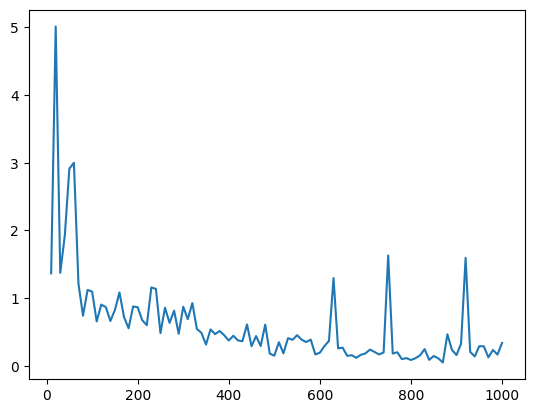

In [14]:
# Import necessary libraries
import torch
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import transforms

# Create a Siamese dataset and dataloader
train_dataloader = DataLoader(siamese_dataset, shuffle=True, num_workers=8, batch_size=train_batch_size)

# Initialize the Siamese network
net = SiameseNetwork()

# Define the contrastive loss and the Adam optimizer
criterion = ContrastiveLoss()
optimizer = optim.Adam(net.parameters(), lr=0.0005)

# Lists to track training progress
counter = []
loss_history = []
iteration_number = 0

# Training Loop
for epoch in range(0,train_number_epochs):
    for i, data in enumerate(train_dataloader, 0):
        img0, img1, label = data
        img0, img1, label = img0, img1, label

        # Zero the gradients, forward pass, backward pass, and optimization step
        optimizer.zero_grad()
        output1, output2 = net(img0, img1)
        loss_contrastive = criterion(output1, output2, label)
        loss_contrastive.backward()
        optimizer.step()

        if i % 10 == 0:
            # Print training progress
            print("Epoch number {}\nCurrent loss {}\n".format(epoch, loss_contrastive.item()))
            iteration_number += 10
            counter.append(iteration_number)
            loss_history.append(loss_contrastive.item())

# Visualize the loss
show_plot(counter, loss_history)

#source: https://github.com/nevoit/Siamese-Neural-Networks-for-One-shot-Image-Recognition/blob/master/siamese_network.py

In [15]:
folder_validation = dset.ImageFolder(root='validation')

In [16]:
from torch.utils.data import DataLoader

# Creating validation dataloader
validation_dataset = SiameseNetworkDataset(imageFolderDataset=folder_validation,
                                          transform=transforms.Compose([
                                              transforms.Grayscale(num_output_channels=1),
                                              transforms.Resize((100, 100)),
                                              transforms.ToTensor()
                                          ]),
                                          should_invert=False)

validation_dataloader = DataLoader(validation_dataset, num_workers=6, batch_size=1, shuffle=False)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [17]:
correct_predictions = 0
total_predictions = 0

# Seting a dissimilarity threshold for classification
threshold = 1.0

with torch.no_grad():
    for i, data in enumerate(validation_dataloader, 0):
        img0, img1, label = data
        img0, img1, label = img0, img1, label
        output1, output2 = net(img0, img1)
        euclidean_distance = torch.nn.functional.pairwise_distance(output1, output2)


        predictions = (euclidean_distance < threshold).long()

        correct_predictions += torch.sum(predictions == label).item()
        total_predictions += label.size(0)

# Calculate accuracy
accuracy = correct_predictions / total_predictions
print("Validation Accuracy:", accuracy)

Validation Accuracy: 0.36134453781512604


In [18]:
folder_test = dset.ImageFolder(root='test')

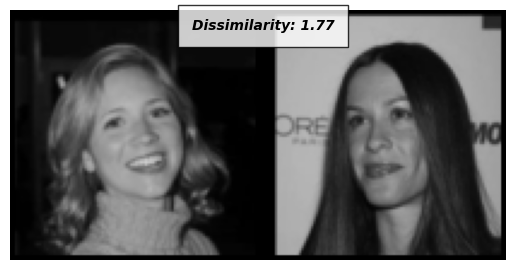

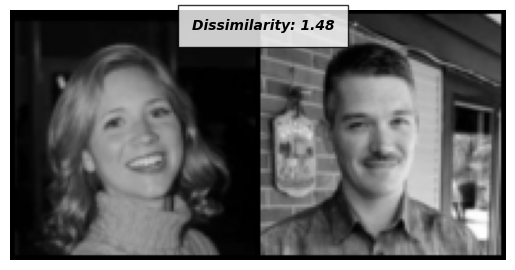

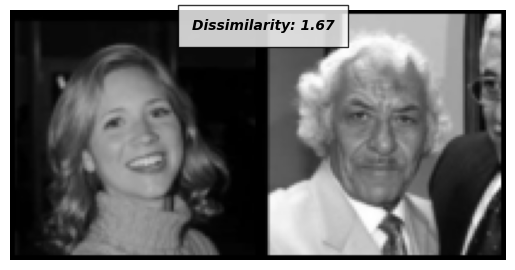

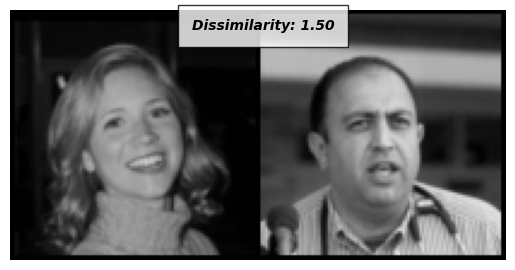

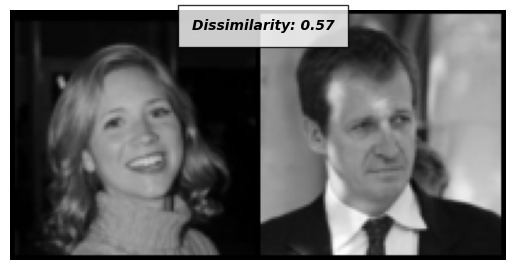

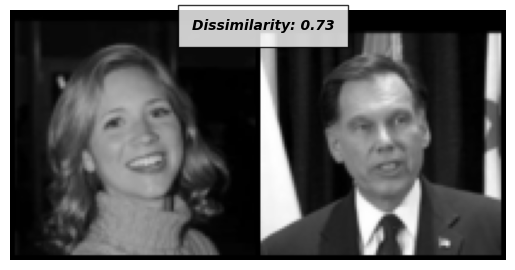

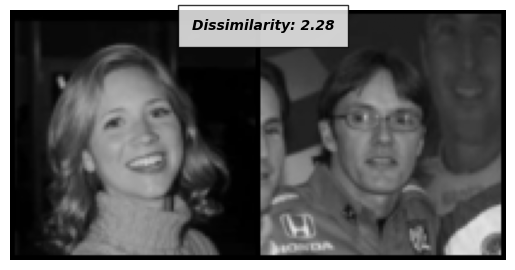

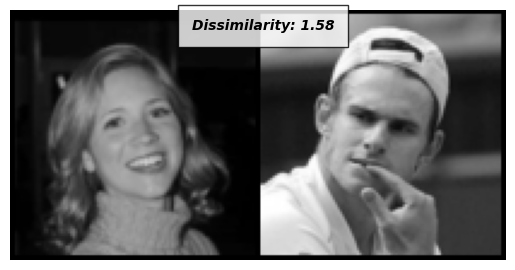

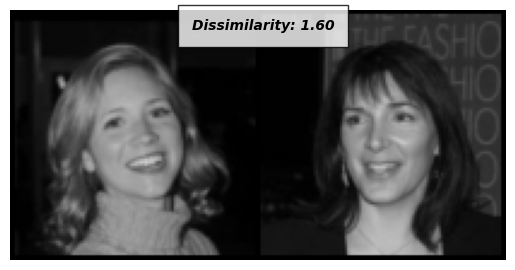

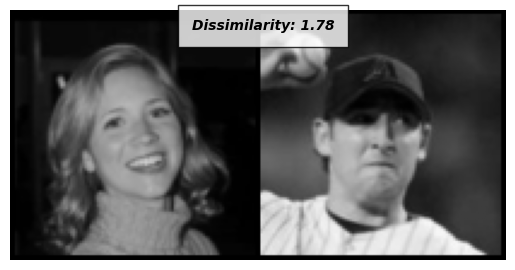

In [40]:
siamese_dataset = SiameseNetworkDataset(imageFolderDataset=folder_test,
                                        transform=transforms.Compose([transforms.Resize((100,100)),
                                                                      transforms.ToTensor()
                                                                      ])
                                       ,should_invert=False)

test_dataloader = DataLoader(siamese_dataset,num_workers=6,batch_size=1,shuffle=True)
dataiter = iter(test_dataloader)
x0,_,_ = next(dataiter)

for i in range(10):
    _,x1,label2 = next(dataiter)
    concatenated = torch.cat((x0,x1),0)

    output1,output2 = net(Variable(x0),Variable(x1))
    euclidean_distance = F.pairwise_distance(output1, output2)
    imshow(torchvision.utils.make_grid(concatenated),'Dissimilarity: {:.2f}'.format(euclidean_distance.item()))

In [21]:
save_path = "siamese_network_model.pth"

# Saving model
torch.save(net.state_dict(), save_path)

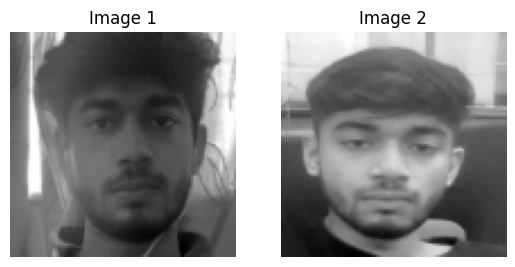

Dissimilarity: 0.8452850580215454
Likely the same person


In [23]:
# Load the trained Siamese Network model
siamese_net = SiameseNetwork()
siamese_net.load_state_dict(torch.load("/content/siamese_network_model.pth"))
siamese_net.eval()

# Load and preprocess the images
transform = transforms.Compose([transforms.Grayscale(num_output_channels=1),
                                transforms.Resize((100, 100)),
                                transforms.ToTensor()])
image1 = Image.open("/content/129.jpeg")
image2 = Image.open("/content/113.jpeg")

image1 = transform(image1).unsqueeze(0)
image2 = transform(image2).unsqueeze(0)

# Calculating the dissimilarity
with torch.no_grad():
    output1, output2 = siamese_net(image1, image2)
    euclidean_distance = torch.nn.functional.pairwise_distance(output1, output2)

# Set a dissimilarity threshold
threshold = 1.0

# Display the images side by side with their dissimilarity
concatenated = torch.cat((image1, image2), 0)

# Display the images
plt.subplot(1, 2, 1)
plt.imshow(image1.cpu().squeeze().numpy(), cmap='gray')
plt.axis("off")
plt.title("Image 1")

plt.subplot(1, 2, 2)
plt.imshow(image2.cpu().squeeze().numpy(), cmap='gray')
plt.axis("off")
plt.title("Image 2")

plt.show()

# Print the dissimilarity
print("Dissimilarity:", euclidean_distance.item())

# Determine if the images are likely of the same person based on the threshold
if euclidean_distance < threshold:
    print("Likely the same person")
else:
    print("Likely different people")

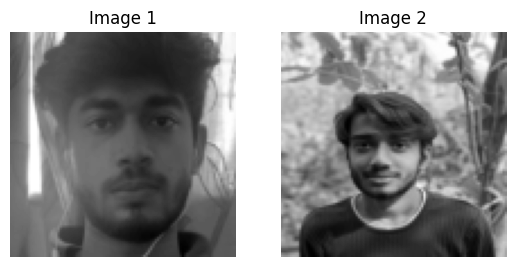

Dissimilarity: 1.2064508199691772
Likely different people


In [27]:
# Load the trained Siamese Network model
siamese_net = SiameseNetwork()
siamese_net.load_state_dict(torch.load("/content/siamese_network_model.pth"))
siamese_net.eval()

# Load and preprocess the images
transform = transforms.Compose([transforms.Grayscale(num_output_channels=1),
                                transforms.Resize((100, 100)),
                                transforms.ToTensor()])
image1 = Image.open("/content/129.jpeg")
image2 = Image.open("/content/C46FFB1D-F5AD-45C0-975F-616FABF4261A_1_201_a.jpg")

image1 = transform(image1).unsqueeze(0)
image2 = transform(image2).unsqueeze(0)

# Calculating the dissimilarity
with torch.no_grad():
    output1, output2 = siamese_net(image1, image2)
    euclidean_distance = torch.nn.functional.pairwise_distance(output1, output2)

# Set a dissimilarity threshold
threshold = 1.0

# Display the images side by side with their dissimilarity
concatenated = torch.cat((image1, image2), 0)

# Display the images
plt.subplot(1, 2, 1)
plt.imshow(image1.cpu().squeeze().numpy(), cmap='gray')
plt.axis("off")
plt.title("Image 1")

plt.subplot(1, 2, 2)
plt.imshow(image2.cpu().squeeze().numpy(), cmap='gray')
plt.axis("off")
plt.title("Image 2")

plt.show()

# Print the dissimilarity
print("Dissimilarity:", euclidean_distance.item())

# Determine if the images are likely of the same person based on the threshold
if euclidean_distance < threshold:
    print("Likely the same person")
else:
    print("Likely different people")

Experiments: Image Augmentation and **Dropout**

In [28]:
data_augmentation_transform = transforms.Compose([
    T.RandomHorizontalFlip(),
    T.RandomVerticalFlip(),
    T.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
    T.RandomRotation(degrees=(-30, 30)),
])

In [29]:
class SiameseNetwork(nn.Module):
    def __init__(self):
        super(SiameseNetwork, self).__init__()
        self.cnn1 = nn.Sequential(
            nn.ReflectionPad2d(1),
            nn.Conv2d(1, 4, kernel_size=3),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(4),

            nn.ReflectionPad2d(1),
            nn.Conv2d(4, 8, kernel_size=3),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(8),


            nn.ReflectionPad2d(1),
            nn.Conv2d(8, 8, kernel_size=3),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(8),
            nn.Dropout(0.5)
# adding a droput layer

        )

        self.fc1 = nn.Sequential(
            nn.Linear(8*100*100, 500),
            nn.ReLU(inplace=True),

            nn.Linear(500, 500),
            nn.ReLU(inplace=True),

            nn.Linear(500, 5))

    def forward_once(self, x):
        output = self.cnn1(x)
        output = output.view(output.size()[0], -1)
        output = self.fc1(output)
        return output

    def forward(self, input1, input2):
        output1 = self.forward_once(input1)
        output2 = self.forward_once(input2)
        return output1, output2

In [30]:
folder_dataset = dset.ImageFolder(root='train')
siamese_dataset = SiameseNetworkDataset(imageFolderDataset=folder_dataset,
                                        transform=transforms.Compose([transforms.Resize((100,100)),
                                                                      transforms.ToTensor()
                                                                      ])
                                       ,should_invert=False)

In [31]:
train_dataloader = DataLoader(siamese_dataset,
                        shuffle=True,
                        num_workers=8,
                        batch_size=train_batch_size)

In [32]:
net = SiameseNetwork()
criterion = ContrastiveLoss()
optimizer = optim.Adam(net.parameters(),lr = 0.0005 )

In [33]:
counter = []
loss_history = []
iteration_number= 0


for epoch in range(0,train_number_epochs):
    for i, data in enumerate(train_dataloader,0):
        img0, img1 , label = data
        img0, img1 , label = img0, img1 , label
        optimizer.zero_grad()
        output1,output2 = net(img0,img1)
        loss_contrastive = criterion(output1,output2,label)
        loss_contrastive.backward()
        optimizer.step()
        if i %10 == 0 :
            print("Epoch number {}\n Current loss {}\n".format(epoch,loss_contrastive.item()))
            iteration_number +=10
            counter.append(iteration_number)
            loss_history.append(loss_contrastive.item())

Epoch number 0
 Current loss 1.2255804538726807

Epoch number 1
 Current loss 1.188874363899231

Epoch number 2
 Current loss 2.5310559272766113

Epoch number 3
 Current loss 1.1350352764129639

Epoch number 4
 Current loss 0.8557450175285339

Epoch number 5
 Current loss 1.3659120798110962

Epoch number 6
 Current loss 0.886288583278656

Epoch number 7
 Current loss 1.6861274242401123

Epoch number 8
 Current loss 1.2370576858520508

Epoch number 9
 Current loss 0.7303553819656372

Epoch number 10
 Current loss 0.6543086767196655

Epoch number 11
 Current loss 0.695923924446106

Epoch number 12
 Current loss 0.6715370416641235

Epoch number 13
 Current loss 0.772013783454895

Epoch number 14
 Current loss 0.6962710022926331

Epoch number 15
 Current loss 0.8542296886444092

Epoch number 16
 Current loss 0.6090810298919678

Epoch number 17
 Current loss 1.3943700790405273

Epoch number 18
 Current loss 0.9576379656791687

Epoch number 19
 Current loss 0.5255966186523438

Epoch number 2

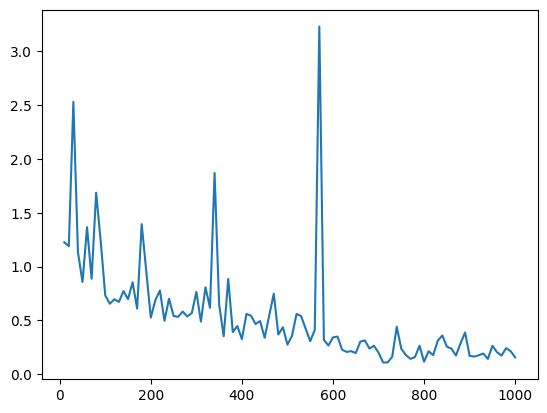

In [34]:


show_plot(counter,loss_history)

Conclusion: **Image augmentation** and **dropout** decreases the training loss as expected and have a much better convergence as compared to basic setup

**SGD Optimizer **

In [35]:
net = SiameseNetwork()
criterion = ContrastiveLoss()
optimizer = optim.SGD(net.parameters(),lr = 0.0005 ) # Using SGD

In [36]:
counter = []
loss_history = []
iteration_number= 0

for epoch in range(0,train_number_epochs):
    for i, data in enumerate(train_dataloader,0):
        img0, img1 , label = data
        img0, img1 , label = img0, img1 , label
        optimizer.zero_grad()
        output1,output2 = net(img0,img1)
        loss_contrastive = criterion(output1,output2,label)
        loss_contrastive.backward()
        optimizer.step()
        if i %10 == 0 :
            print("Epoch number {}\n Current loss {}\n".format(epoch,loss_contrastive.item()))
            iteration_number +=10
            counter.append(iteration_number)
            loss_history.append(loss_contrastive.item())


Epoch number 0
 Current loss 1.371363639831543

Epoch number 1
 Current loss 1.3904520273208618

Epoch number 2
 Current loss 0.9860825538635254

Epoch number 3
 Current loss 0.967891275882721

Epoch number 4
 Current loss 0.894646406173706

Epoch number 5
 Current loss 0.758357048034668

Epoch number 6
 Current loss 0.8723875880241394

Epoch number 7
 Current loss 0.8064068555831909

Epoch number 8
 Current loss 0.7503268122673035

Epoch number 9
 Current loss 0.8036602139472961

Epoch number 10
 Current loss 0.8827393054962158

Epoch number 11
 Current loss 0.9405909180641174

Epoch number 12
 Current loss 0.9065495729446411

Epoch number 13
 Current loss 0.9124065041542053

Epoch number 14
 Current loss 0.5600429773330688

Epoch number 15
 Current loss 0.8752151727676392

Epoch number 16
 Current loss 0.8503756523132324

Epoch number 17
 Current loss 0.7238997220993042

Epoch number 18
 Current loss 0.7697622776031494

Epoch number 19
 Current loss 0.7946376800537109

Epoch number 2

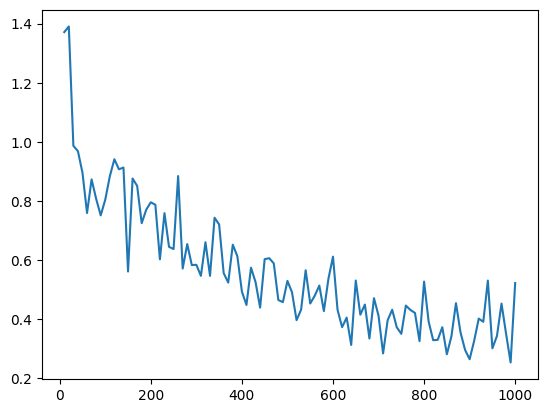

In [37]:
show_plot(counter,loss_history)

In **stochastic gradient descent (SGD)**, the loss tends to exhibit more significant fluctuations or noise compared to the Adam optimizer. This discrepancy arises because Adam incorporates a momentum term that serves to expedite the convergence process, particularly when dealing with gradients that may be erratic or noisy. This momentum term effectively accumulates information from past gradients, empowering the optimizer to maintain a consistent direction of progress, even when gradients exhibit rapid fluctuations.

**Adding Rate Schedulers**

In [38]:
# Initializing Siamese Network model
siamese_net = SiameseNetwork()

criterion = ContrastiveLoss()

optimizer_step_lr = optim.Adam(siamese_net.parameters(), lr=0.0005)
optimizer_reduce_lr = optim.Adam(siamese_net.parameters(), lr=0.0005)


# Define learning rate schedulers
scheduler_step_lr = StepLR(optimizer, step_size=10, gamma=0.5)  # Step Learning Rate Scheduler
scheduler_reduce_lr = ReduceLROnPlateau(optimizer, 'min', patience=5, factor=0.1, verbose=True)  # ReduceLROnPlateau Learning Rate Scheduler

In [39]:
num_epochs = 20
train_losses_step_lr, val_losses_step_lr = [], []

for epoch in range(num_epochs):
    siamese_net.train()
    for i, data in enumerate(train_dataloader, 0):
        img0, img1, label = data
        img0, img1, label = img0, img1, label

        optimizer_step_lr.zero_grad()
        output1, output2 = siamese_net(img0, img1)
        loss_contrastive = criterion(output1, output2, label)
        loss_contrastive.backward()
        optimizer_step_lr.step()

    # Validation
    with torch.no_grad():
        siamese_net.eval()
        val_loss = 0
        for i, data in enumerate(validation_dataloader, 0):
            img0, img1, label = data
            img0, img1, label = img0, img1, label
            output1, output2 = siamese_net(img0, img1)
            val_loss += criterion(output1, output2, label).item()
        val_losses_step_lr.append(val_loss)

    # Update the learning rate using the scheduler
    scheduler_step_lr.step()


    print(f'Epoch [{epoch + 1}/{num_epochs}]')


print("Training completed for", num_epochs, "epochs")

KeyboardInterrupt: ignored

In [ ]:
# Training loop with ReduceLROnPlateau scheduler
train_losses_reduce_lr, val_losses_reduce_lr = [], []

for epoch in range(num_epochs):
    siamese_net.train()
    for i, data in enumerate(validation_dataloader, 0):
        # Training code using your Siamese Network
        img0, img1, label = data
        img0, img1, label = img0, img1, label

        optimizer_reduce_lr.zero_grad()
        output1, output2 = siamese_net(img0, img1)
        loss_contrastive = criterion(output1, output2, label)
        loss_contrastive.backward()
        optimizer_reduce_lr.step()

    # Validation
    with torch.no_grad():
        siamese_net.eval()
        val_loss = 0
        for i, data in enumerate(test_dataloader, 0):
            img0, img1, label = data
            img0, img1, label = img0, img1, label
            output1, output2 = siamese_net(img0, img1)
            val_loss += criterion(output1, output2, label).item()
        val_losses_reduce_lr.append(val_loss)

    # Update the learning rate using the scheduler based on validation loss
    scheduler_reduce_lr.step(val_loss)

In [ ]:
# Ploting learning curves for StepLR and ReduceLROnPlateau
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_losses_step_lr, label='StepLR: Train Loss')
plt.plot(val_losses_step_lr, label='StepLR: Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_losses_reduce_lr, label='ReduceLR: Train Loss')
plt.plot(val_losses_reduce_lr, label='ReduceLR: Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

**StepLR is better here **

 The ReduceLROnPlateau scheduler may trigger learning rate reductions too often. In such cases, the StepLR scheduler, which reduces the learning rate at fixed intervals regardless of loss variations, can provide more stable training.